In [107]:
import tensorflow as tf 

mnist = tf.keras.datasets.mnist # dataset: 28x28 bilder av handskrivna siffror 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data() #Lägger in siffrorna i träning och test variablar

x_train = tf.keras.utils.normalize(x_train, axis=1) #Normaliserar datan i bilderna så att de varierar från 0-1
x_test = tf.keras.utils.normalize(x_test, axis=1) #Datorn har enklare att jobba med normaliserad data.

model = tf.keras.models.Sequential() #ett linjärt nätverk
model.add(tf.keras.layers.Flatten()) #input-lager. 
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu)) #Gömt lager, 256 neuroner. Aktivationsfunktion = relu
model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu)) #ett till av ett likadant gömt-lager 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #10 output-neuroner för 10 svar (0-9) 
#Softmax används för probabilitet distribution. Vi vill att nätverket ska välja den som har högst probabilitet. 
#Flatten gör pixlarna i bilderna till neuroner. Alltså 28x28 = 784 neuroner
#Dense är en lagertyp som gör så att output = activation(inputs * vikter + bias) 
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']) #adam som optimizer scc som loss-funktion. Vi vill se accuracy 

model.fit(x_train, y_train, batch_size=15, epochs=10) #Säger åt programmet att träna på bilderna med 10 epoker. 
#Gör batchstorlek till 15

Epoch 1/10
60000/60000 [==============================] - 15s 242us/step - loss: 0.2035 - acc: 0.9389
Epoch 2/10
60000/60000 [==============================] - 13s 209us/step - loss: 0.0866 - acc: 0.9730
Epoch 3/10
60000/60000 [==============================] - 12s 208us/step - loss: 0.0593 - acc: 0.9810
Epoch 4/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0433 - acc: 0.9862
Epoch 5/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.0348 - acc: 0.9888
Epoch 6/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.0262 - acc: 0.9916
Epoch 7/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.0238 - acc: 0.9923
Epoch 8/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.0200 - acc: 0.9934
Epoch 9/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.0166 - acc: 0.9949
Epoch 10/10
60000/60000 [==============================] - 12s 205us/step - loss: 

In [108]:
val_loss, val_acc = model.evaluate(x_test, y_test) #Man ska hoppas på att modellen generaliserar hur olika siffror ser ut och inte momorizerar din specifika data.
print(val_loss, val_acc) #testar för overfitting

10000/10000 [==============================] - 1s 85us/step
0.11221527411372809 0.9795


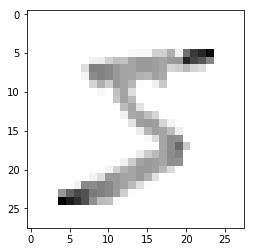

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [109]:
import matplotlib.pyplot as plt #gör så jag kan se bilderna 
 
plt.imshow(x_train[0], cmap = plt.cm.binary) 
plt.show() #Visar bilden på bild nummer 0 av 60000 som finns i träningsettet.
print(x_train[0]) #Visar tensorn av x_train[0] De betonade pixlarna har nummer över 0

In [110]:
model.save('Gymnasiearbete-AI') #sparar nätverket i namnet 'Garb-AI'

In [113]:
new_nn = tf.keras.models.load_model('Gymnasiearbete-AI') #Laddar in nätverket under namnet new_nn (neural network) så jag kan använda den för att se förutsägelsarna av nätverket

In [114]:
predictions = new_nn.predict([x_test]) #en "predict" model för att kunna visa vad nätverk svarar.

In [115]:
print(predictions) #Det här är arrays som är probabilitet distribution. 
#Inte så lätt att tolka så vi måste transformera dessa nummer.

[[1.3571454e-19 7.7840024e-15 3.4355604e-12 ... 1.0000000e+00
  1.6307295e-14 3.0864142e-12]
 [1.9307909e-20 2.9385372e-14 1.0000000e+00 ... 1.2009970e-21
  2.1781085e-24 4.0986982e-26]
 [2.3111311e-17 1.0000000e+00 3.3132830e-10 ... 3.7247947e-08
  3.7240236e-10 8.9470701e-15]
 ...
 [4.9318607e-19 6.1379294e-15 8.0765501e-18 ... 2.2318402e-14
  2.7081067e-12 5.2789934e-13]
 [3.2312418e-23 1.0190264e-24 4.7268886e-25 ... 1.2746841e-23
  4.2386148e-08 5.0252616e-18]
 [8.6583401e-16 3.4277998e-22 8.8253729e-16 ... 3.3965183e-24
  6.4614194e-14 4.2914977e-20]]


In [116]:
import numpy as np #numpy används för att kunna tolka arrayerna ovan.

print(np.argmax(predictions[129])) #testsettet har 10000 handskrivna nummer 0-9. 

5


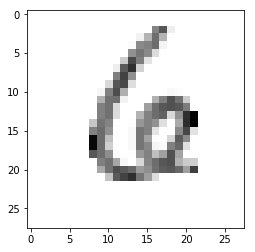

In [117]:
plt.imshow(x_test[123], cmap = plt.cm.binary) #Detta gör så att den handskrivna siffran kan visas 
plt.show() 